## IS 310 Project

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("action_series.csv.zip", compression = 'zip')
df

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue
0,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN
1,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN
3,John Wick: Chapter 4,tt10366206,2023,"Action, Crime, Thriller","Director:, Chad Stahelski, | , Stars:, Kea...",John Wick uncovers a path to defeating The Hig...,8.0,169 min,R,195078,NaN
4,Fast X,tt5433140,2023,"Action, Adventure, Crime","Director:, Louis Leterrier, | , Stars:, Vi...",Dom Toretto and his family are targeted by the...,6.3,141 min,PG-13,39326,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11409,Everything Everywhere All at Once,tt6710474,2022,"Action, Adventure, Comedy","Directors:, Daniel Kwan, , Daniel Scheinert, |...",A middle-aged Chinese immigrant is swept up in...,7.8,139 min,R,451293,"72,861,480"
11410,House of the Dragon,tt11198330,2022–,"Action, Adventure, Drama","Stars:, Matt Smith, , Graham McTavish, , Steve...",An internal succession war within House Targar...,8.5,NaN,TV-MA,329111,NaN
11411,Guardians of the Galaxy,tt2015381,2014,"Action, Adventure, Comedy","Director:, James Gunn, | , Stars:, Chris P...",A group of intergalactic criminals must pull t...,8.0,121 min,PG-13,1220519,"333,176,600"
11412,The Witcher,tt5180504,2019–,"Action, Adventure, Drama","Stars:, Henry Cavill, , Freya Allan, , Anya Ch...","Geralt of Rivia, a solitary monster hunter, st...",8.1,60 min,TV-MA,519877,NaN


In [9]:
df = df.dropna(subset=['Rating', 'Number of Votes', 'Release Year'])
df.head()

,Title,IMDb ID,Release Year,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue
0,Spider-Man: Across the Spider-Verse,tt9362722,2023,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN
1,FUBAR,tt13064902,2023–,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN
2,Barry,tt5348176,2018–2023,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN
3,John Wick: Chapter 4,tt10366206,2023,"Action, Crime, Thriller","Director:, Chad Stahelski, | , Stars:, Kea...",John Wick uncovers a path to defeating The Hig...,8.0,169 min,R,195078,NaN
4,Fast X,tt5433140,2023,"Action, Adventure, Crime","Director:, Louis Leterrier, | , Stars:, Vi...",Dom Toretto and his family are targeted by the...,6.3,141 min,PG-13,39326,NaN


In [13]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of Votes'] = pd.to_numeric(df['Number of Votes'], errors='coerce')
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')
df = df.dropna()

In [14]:
df['Longevity'] = 2025 - df['Release Year']

In [15]:
df = df[df['Longevity'] > 0]

In [16]:
print("Descriptive Statistics:")
print(df[['Rating', 'Number of Votes', 'Longevity']].describe())


Descriptive Statistics:
            Rating  Number of Votes    Longevity
count  2540.000000     2.540000e+03  2540.000000
mean      6.367953     1.748090e+05    22.380315
std       1.099520     2.703832e+05    15.661980
min       1.900000     2.640000e+02     3.000000
25%       5.700000     1.308800e+04    10.000000
50%       6.400000     6.016800e+04    19.000000
75%       7.100000     2.079125e+05    33.000000
max       9.000000     2.721277e+06   102.000000


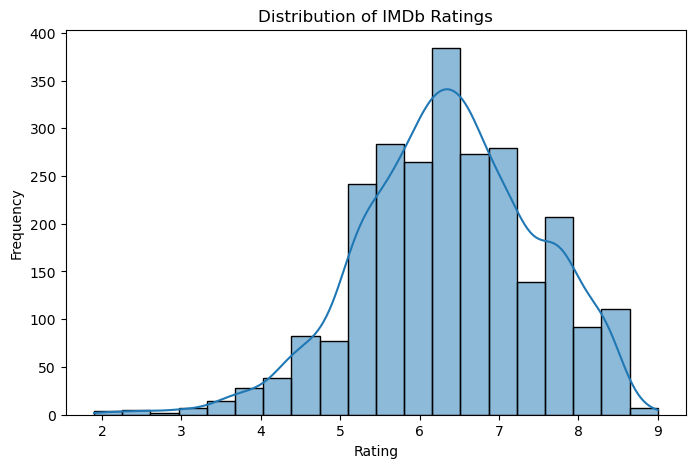

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


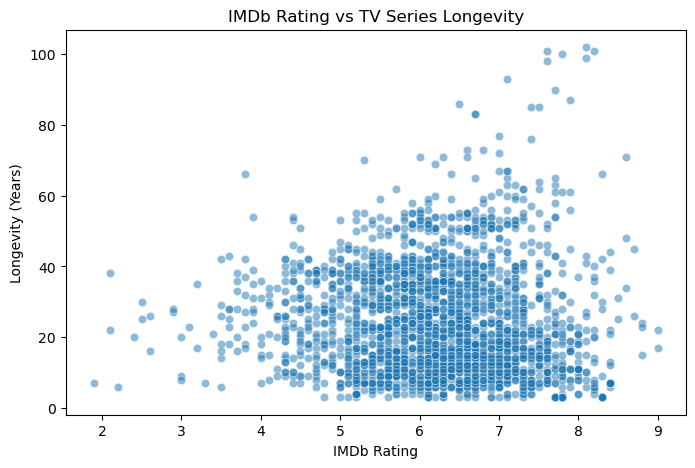

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Rating'], y=df['Longevity'], alpha=0.5)
plt.title('IMDb Rating vs TV Series Longevity')
plt.xlabel('IMDb Rating')
plt.ylabel('Longevity (Years)')
plt.show()


Correlation Matrix:
                   Rating  Number of Votes  Longevity
Rating           1.000000         0.576665  -0.144903
Number of Votes  0.576665         1.000000  -0.316271
Longevity       -0.144903        -0.316271   1.000000


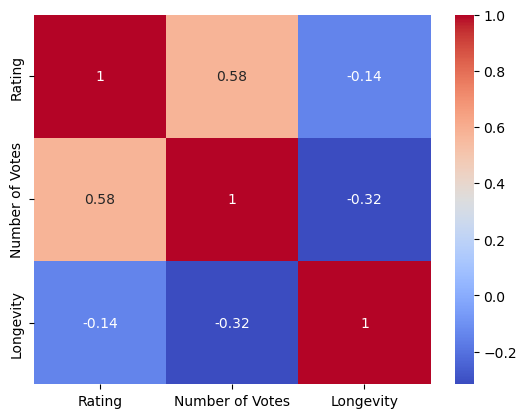

In [19]:
print("Correlation Matrix:")
print(df[['Rating', 'Number of Votes', 'Longevity']].corr())
sns.heatmap(df[['Rating', 'Number of Votes', 'Longevity']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
X = df[['Rating', 'Number of Votes']]
y = df['Longevity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-Squared Score: {r2}')

Mean Squared Error: 273.3184835171721
R-Squared Score: 0.0695499745854361


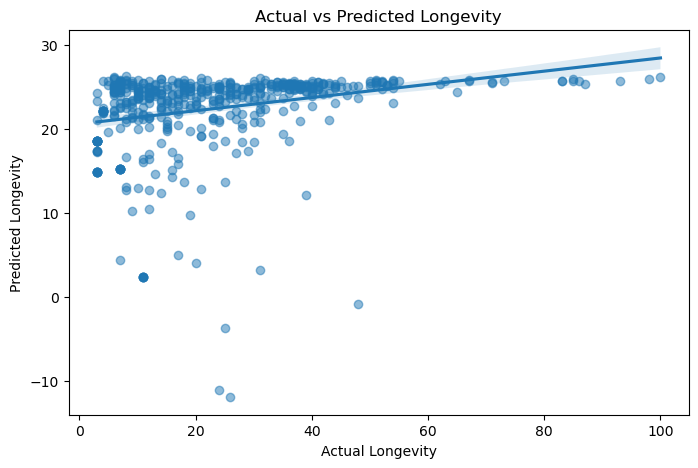

In [23]:
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.title('Actual vs Predicted Longevity')
plt.xlabel('Actual Longevity')
plt.ylabel('Predicted Longevity')
plt.show()